In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from xgboost import XGBClassifier


In [12]:
df = pd.read_csv('Admission_Predict.csv')

In [13]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [14]:
df.drop(columns=["Serial No."], inplace=True)

In [22]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [19]:
X, y = df.drop(columns=["Chance of Admit "]), df["Chance of Admit "]

In [20]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [23]:
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dropout(0.1),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(1, kernel_initializer="uniform", activation="linear"),
])
     

In [24]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,857 (7.25 KB)

 Trainable params: 1,857 (7.25 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"]
)

In [26]:
history = model.fit(train_X, train_y, validation_split=0.1, epochs=32, batch_size=8)


Epoch 1/32
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5221 - mean_squared_error: 0.5221 - val_loss: 0.4311 - val_mean_squared_error: 0.4311
Epoch 2/32
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2457 - mean_squared_error: 0.2457 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 3/32
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 4/32
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 5/32
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 6/32
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 7/32
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0036 - val_mean_

<Axes: >

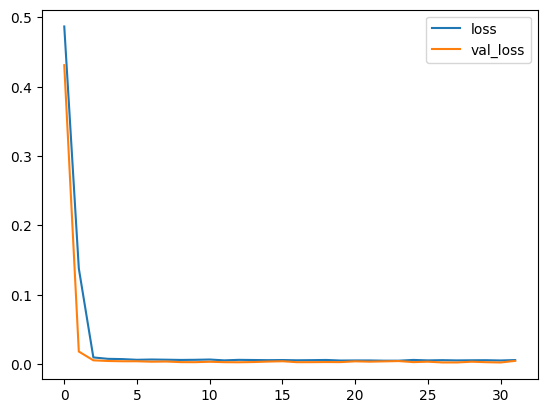

In [27]:
sns.lineplot(history.history['loss'], label='loss')
sns.lineplot(history.history['val_loss'], label='val_loss')

In [28]:
pred_y = model.predict(test_X)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [29]:
r2_score(test_y, pred_y)

0.7826983613005549